<a href="https://colab.research.google.com/github/samsung-chow/324-Project/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import json
from torch.utils.data import DataLoader , TensorDataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import umap.umap_ as umap

import torch.nn.functional as F
from sklearn.model_selection import train_test_split



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
# Load the CSV file; update the filename if needed
df = pd.read_csv("/content/drive/MyDrive/nba/cleaned_data_with_dates.CSV")

df

,team,opponent,attempted_field_goals,attempted_three_point_field_goals,attempted_free_throws,assists,steals,personal_fouls,avg_game_score,percent_fg_made,percent_3p_made,percent_ft_made,ORB,DRB,percent_shots_blocked,TOVR,team_win,opp_win,date
0,12,20,81,30,39,26,8,23,11.033333,0.518519,0.433333,0.717949,0.500000,0.557377,0.016393,0.117112,1,0,140223
1,12,6,82,26,25,22,10,24,8.200000,0.463415,0.423077,0.880000,0.541667,0.466667,0.030303,0.137681,1,0,140327
2,12,24,84,34,33,20,4,20,7.740000,0.404762,0.235294,0.848485,0.250000,0.453333,0.031496,0.056931,0,1,140416
3,12,9,76,24,34,17,6,15,4.950000,0.407895,0.333333,0.647059,0.333333,0.412698,0.008929,0.101594,0,1,140130
4,12,20,92,28,15,26,9,20,6.550000,0.413043,0.285714,0.466667,0.526316,0.436620,0.020408,0.073206,0,1,131121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,24,15,80,34,22,23,7,24,7.100000,0.487500,0.382353,0.818182,0.666667,0.561404,0.000000,0.133165,0,1,151220
8941,24,14,87,30,20,29,3,19,7.538462,0.505747,0.500000,0.600000,0.666667,0.532258,0.030928,0.059791,1,0,150115
8942,24,19,89,21,29,15,4,22,7.730000,0.460674,0.285714,0.758621,0.666667,0.480769,0.000000,0.053946,0,1,151212
8943,24,18,78,27,40,17,4,26,8.670000,0.461538,0.333333,0.900000,0.666667,0.557143,0.028846,0.089153,1,0,160318


In [22]:
df = df.sort_values(by="date").dropna()



In [23]:
target_column = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]

# Inputs
X= df[target_column]

# Outputs
y = df['team_win']
X

,attempted_field_goals,attempted_three_point_field_goals,attempted_free_throws,assists,steals,personal_fouls,avg_game_score,percent_fg_made,percent_3p_made,percent_ft_made,ORB,DRB,percent_shots_blocked,TOVR
7442,70,22,27,22,11,19,9.510000,0.557143,0.500000,0.777778,0.227273,0.590909,0.067308,0.147686
1915,94,23,14,26,8,17,8.160000,0.510638,0.260870,0.500000,0.375000,0.544118,0.050000,0.133652
3056,88,23,14,15,5,25,5.108333,0.454545,0.304348,0.571429,0.588235,0.516129,0.060000,0.092908
19,70,24,34,26,4,29,8.740000,0.500000,0.500000,0.823529,0.500000,0.537037,0.052083,0.121007
5601,84,15,34,18,10,24,8.820000,0.416667,0.400000,0.852941,0.485714,0.413793,0.076087,0.057870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,78,32,24,15,6,12,10.912500,0.487179,0.375000,0.875000,0.555556,0.612903,0.028169,0.104043
4330,80,43,12,32,6,15,13.112500,0.525000,0.441860,0.833333,0.647059,0.592593,0.054545,0.085543
8423,79,31,12,25,5,16,8.333333,0.481013,0.419355,0.750000,0.352941,0.407407,0.016260,0.079821
6008,79,24,16,33,7,22,11.109091,0.670886,0.541667,0.687500,0.437500,0.577778,0.075000,0.098328


# UMAP

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


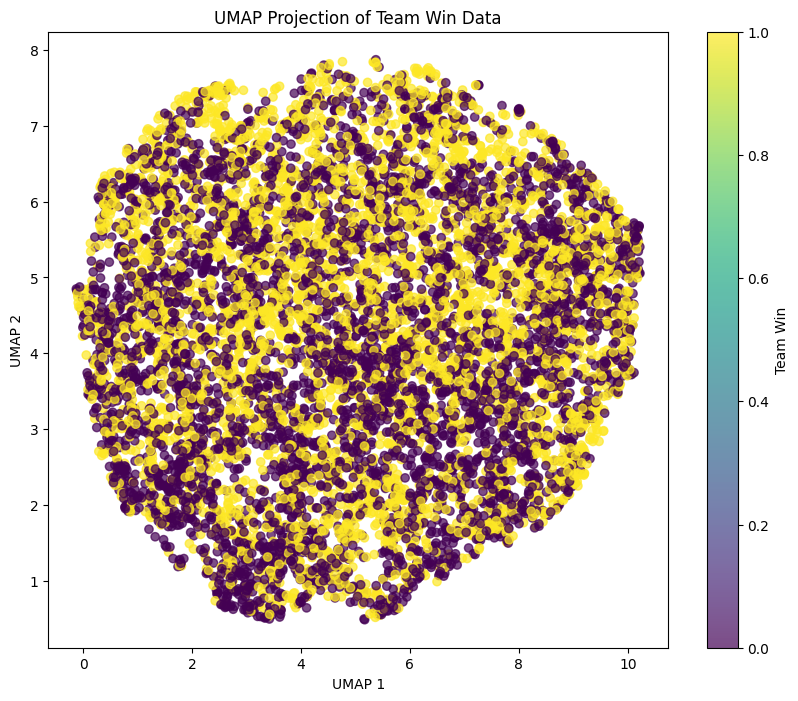

In [24]:
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
embedding = umap_reducer.fit_transform(X)

# Plot the UMAP embedding
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Team Win')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Projection of Team Win Data')
plt.show()

# Kendal Tau

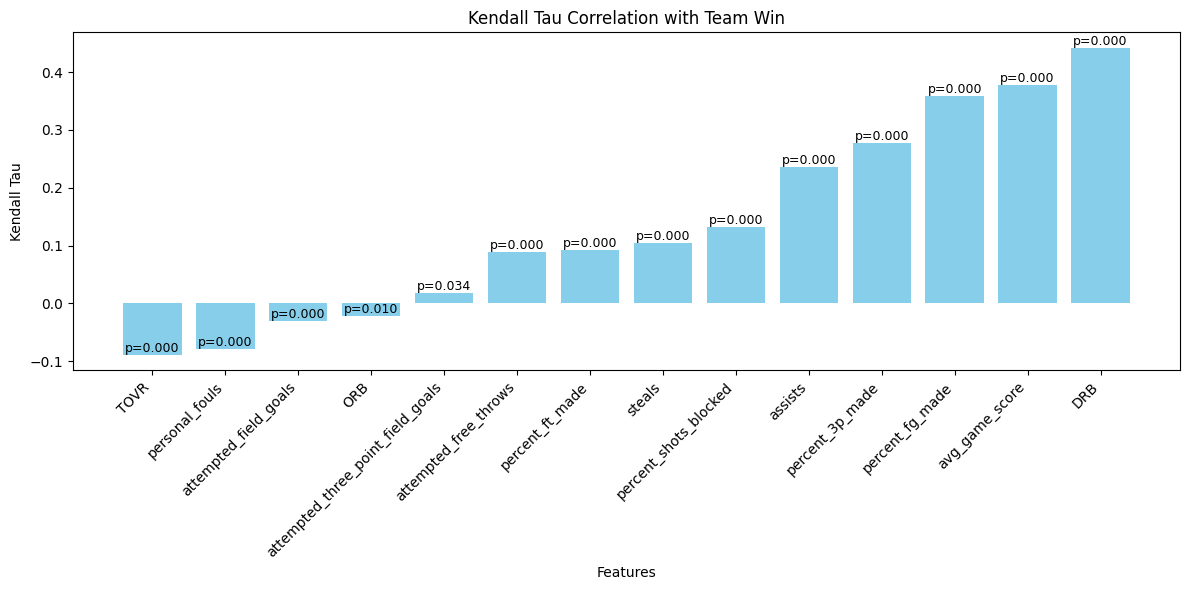

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Define the feature columns and target variable
target_columns = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]

# Compute Kendall tau for each feature against 'team_win'
results = {}
for col in target_columns:
    tau, p_value = kendalltau(df[col], df['team_win'])
    results[col] = {'kendall_tau': tau, 'p_value': p_value}

# Convert the results to a DataFrame and sort by tau values
results_df = pd.DataFrame(results).T
results_df.sort_values(by='kendall_tau', inplace=True)

# Create a bar plot for Kendall tau correlations
plt.figure(figsize=(12, 6))
bars = plt.bar(results_df.index, results_df['kendall_tau'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Kendall Tau')
plt.title('Kendall Tau Correlation with Team Win')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its corresponding p-value
for bar, feature in zip(bars, results_df.index):
    height = bar.get_height()
    p_val = results_df.loc[feature, 'p_value']
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"p={p_val:.3f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


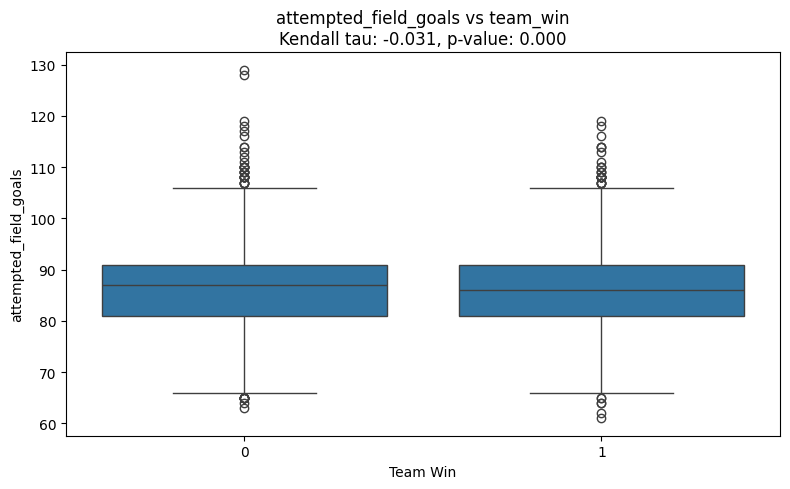

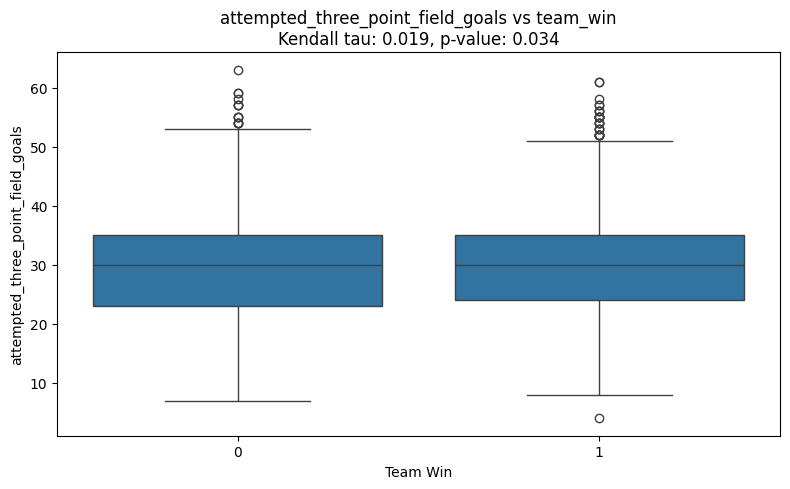

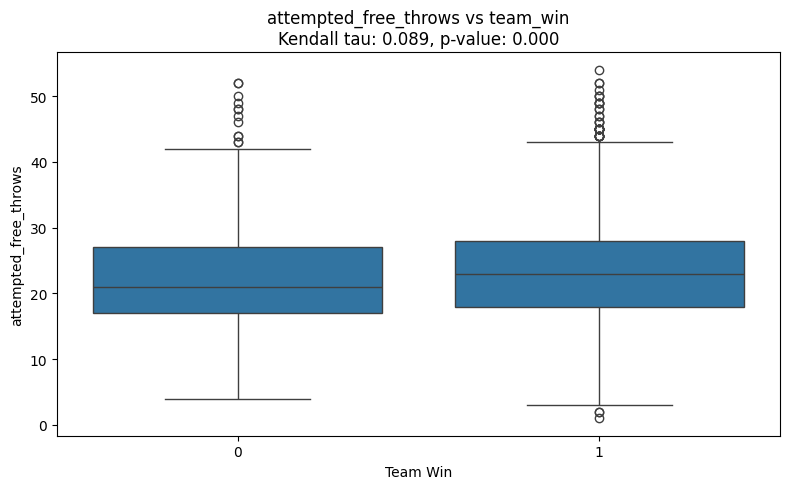

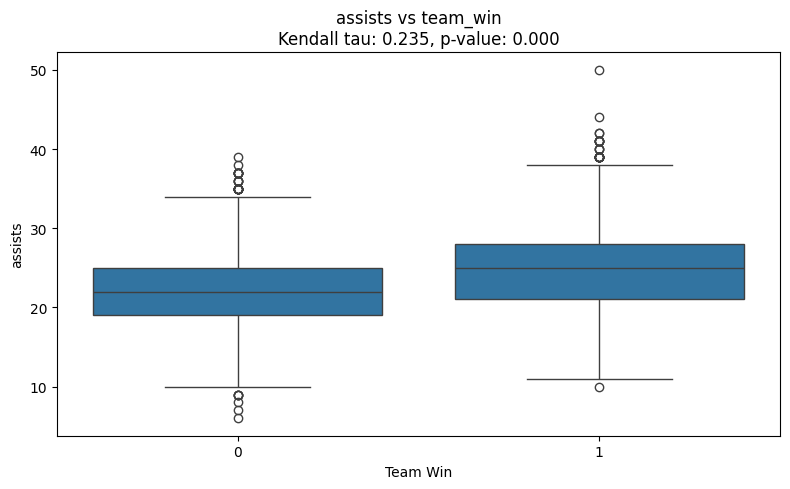

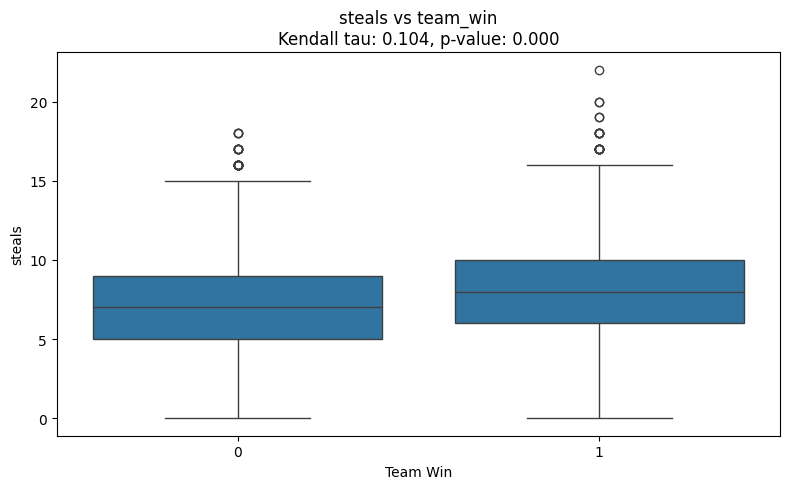

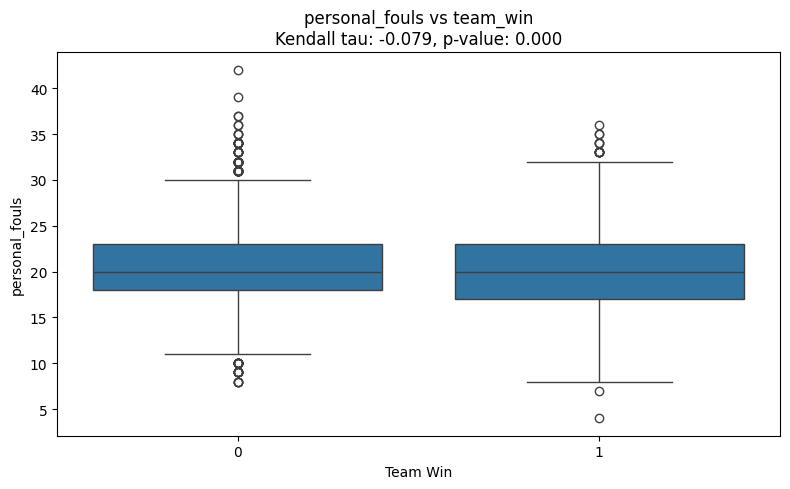

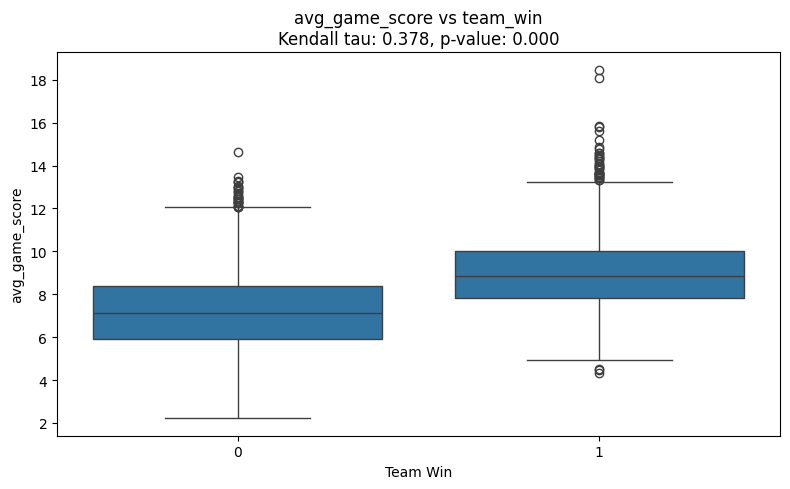

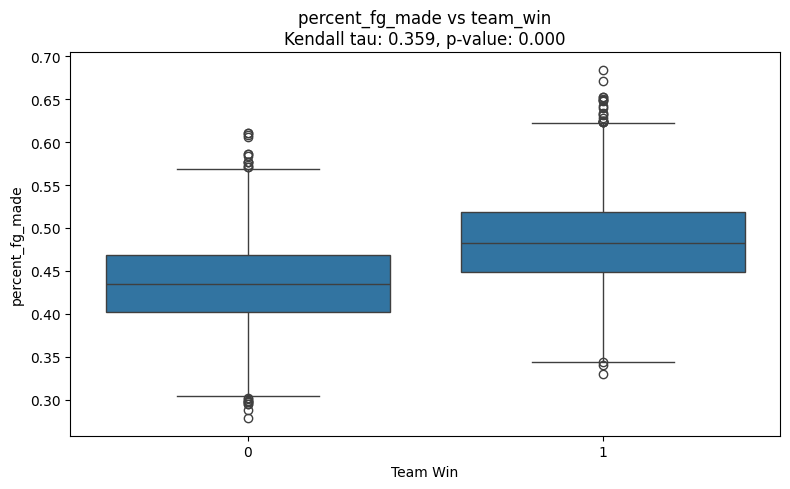

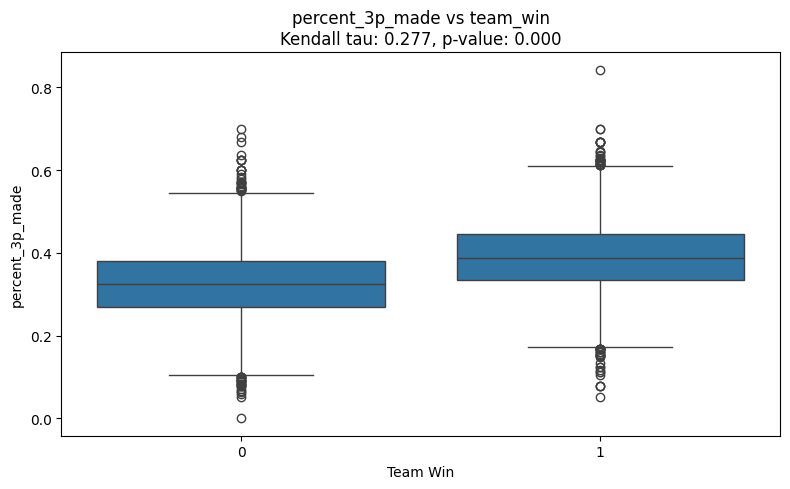

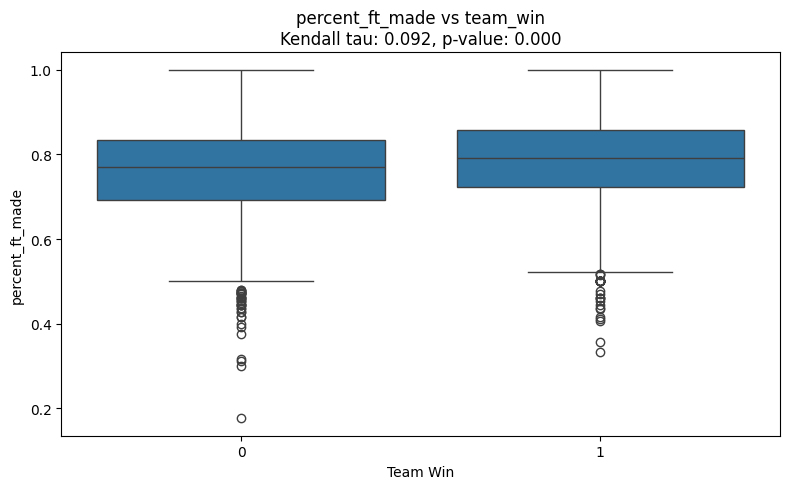

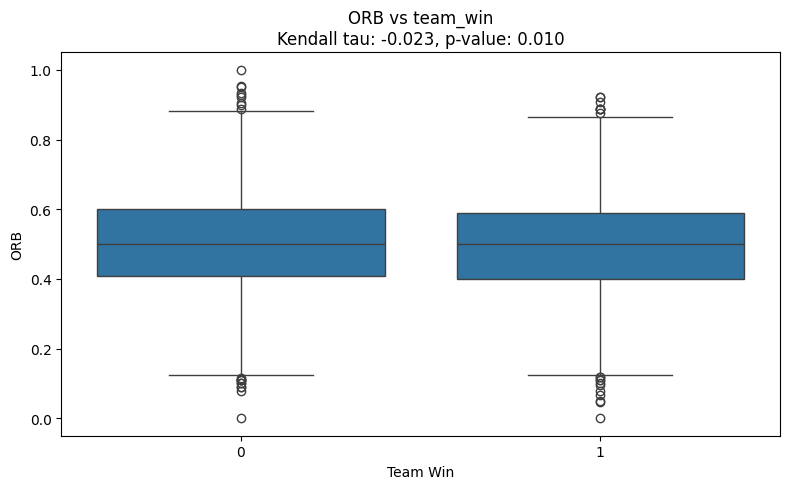

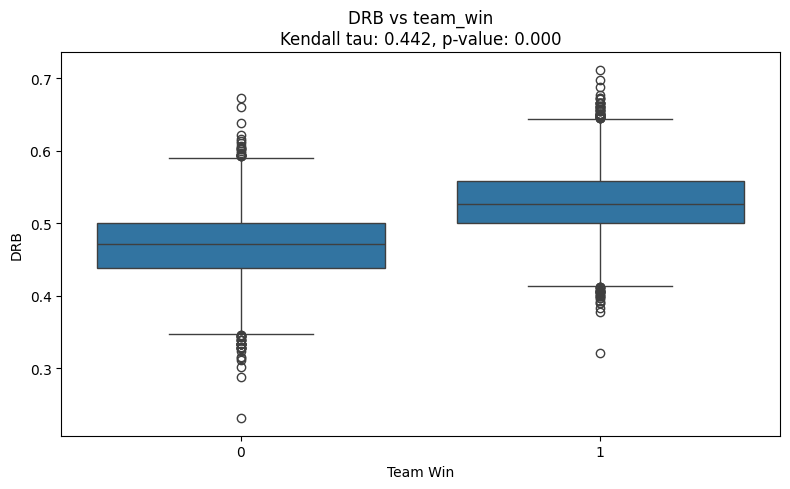

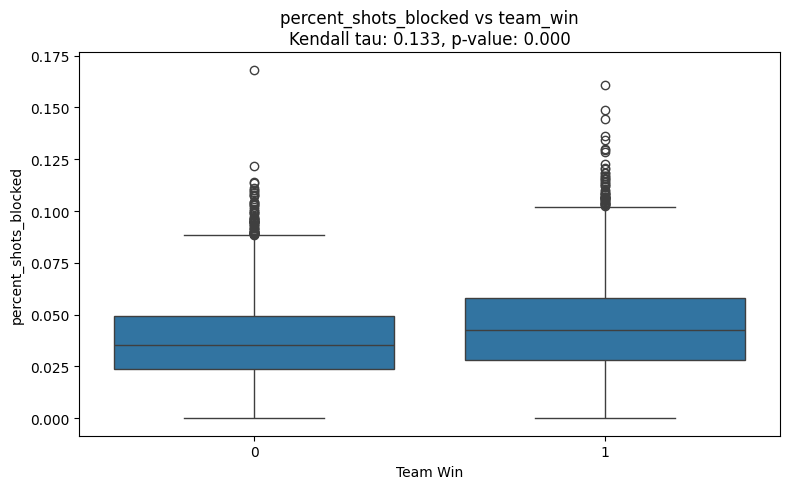

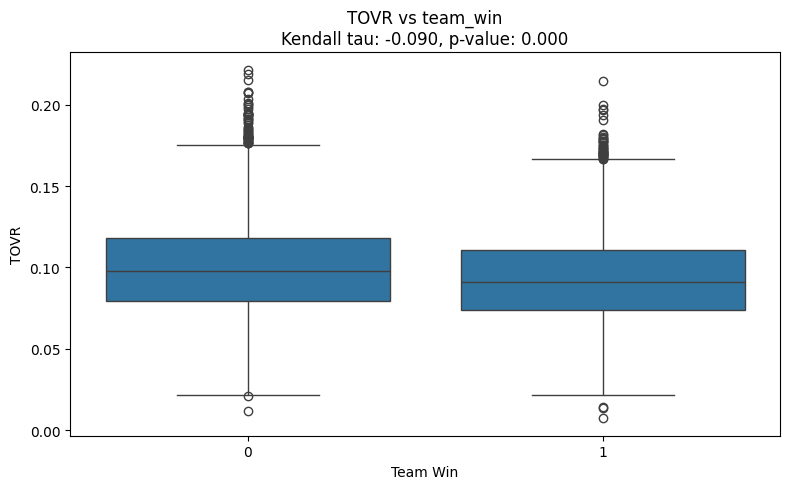

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
# Define the feature columns
target_columns = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]

# Loop through each feature to create an individual plot
for col in target_columns:
    # Calculate Kendall tau for this feature against 'team_win'
    tau, p_value = kendalltau(df[col], df['team_win'])

    # Create a new figure
    plt.figure(figsize=(8, 5))

    # For a binary target like 'team_win', a boxplot is useful.
    sns.boxplot(x=df['team_win'], y=df[col])

    # Annotate the plot with Kendall tau and p-value in the title
    plt.title(f'{col} vs team_win\nKendall tau: {tau:.3f}, p-value: {p_value:.3f}')
    plt.xlabel('Team Win')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

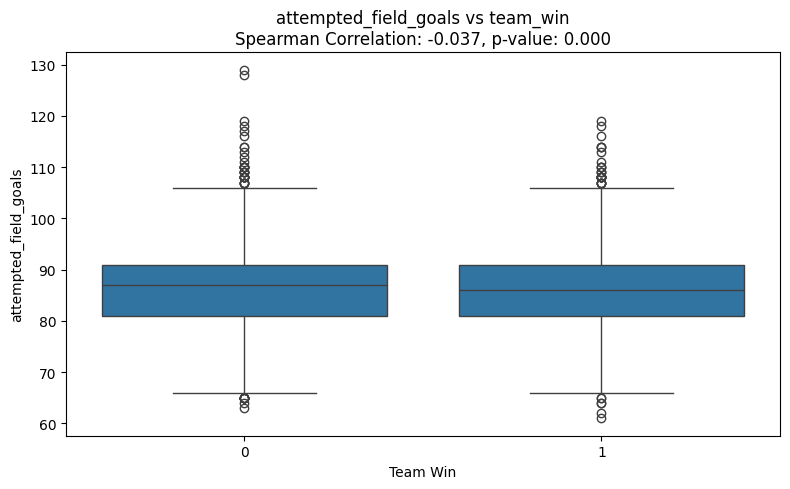

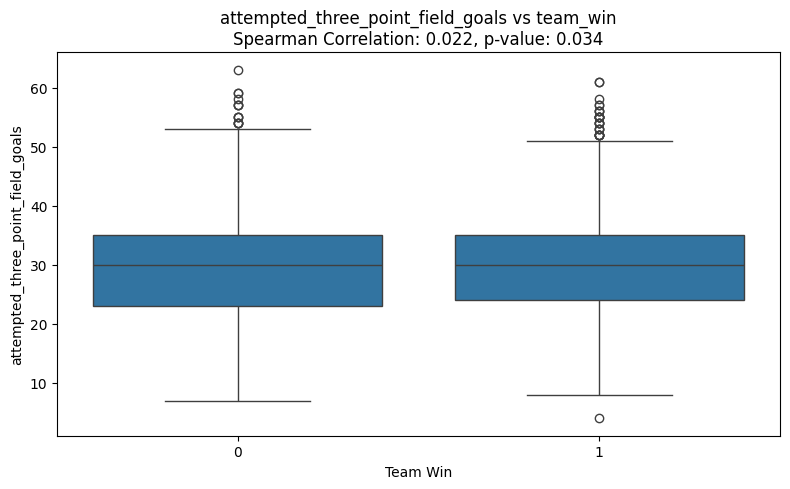

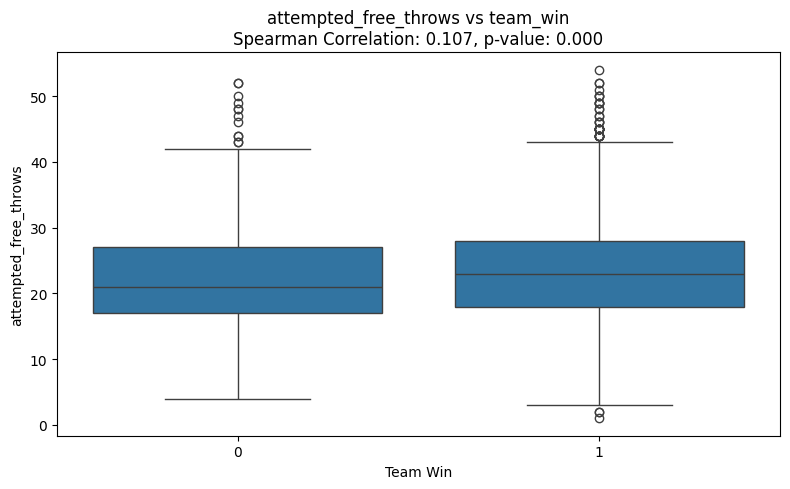

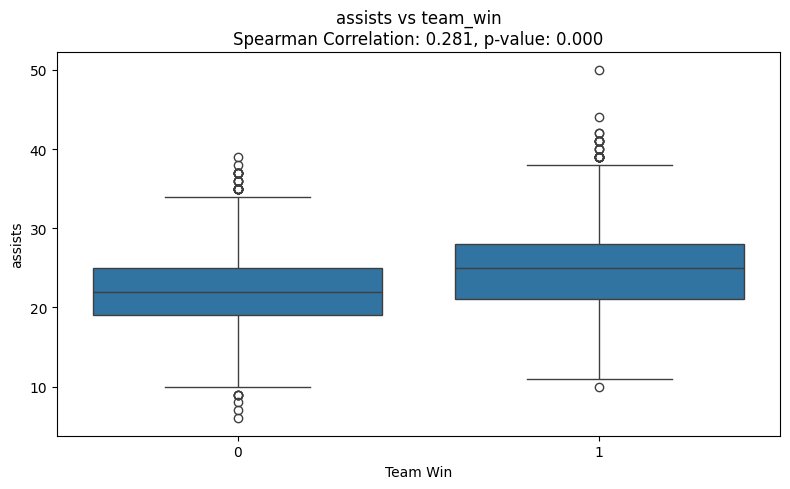

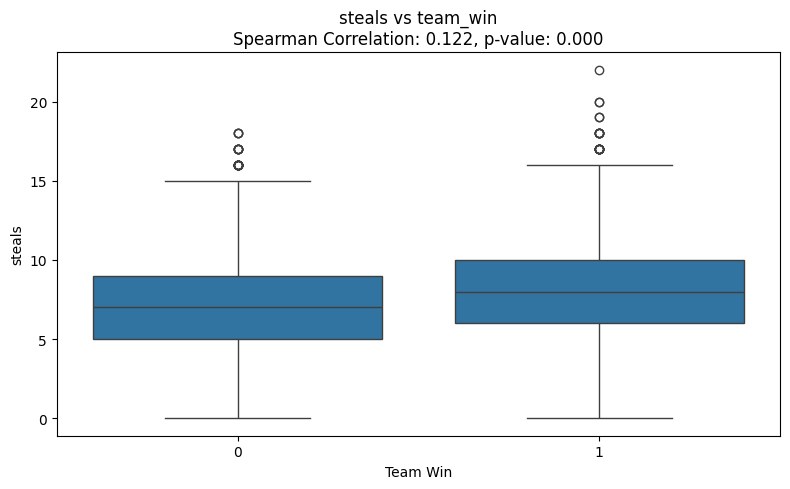

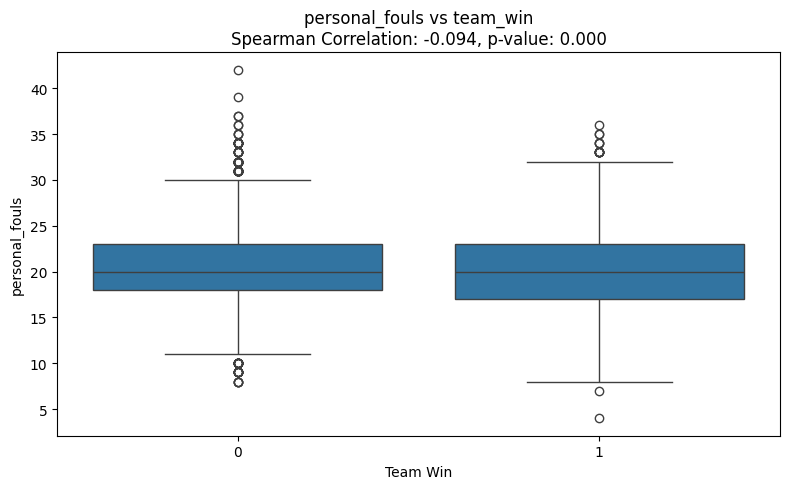

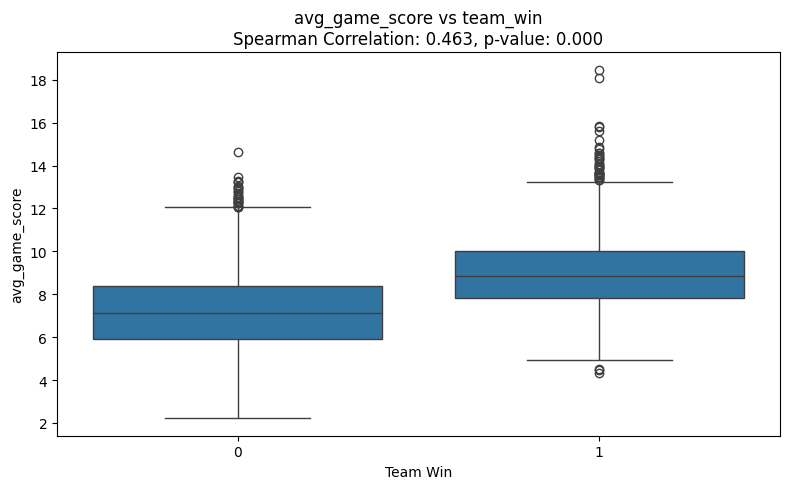

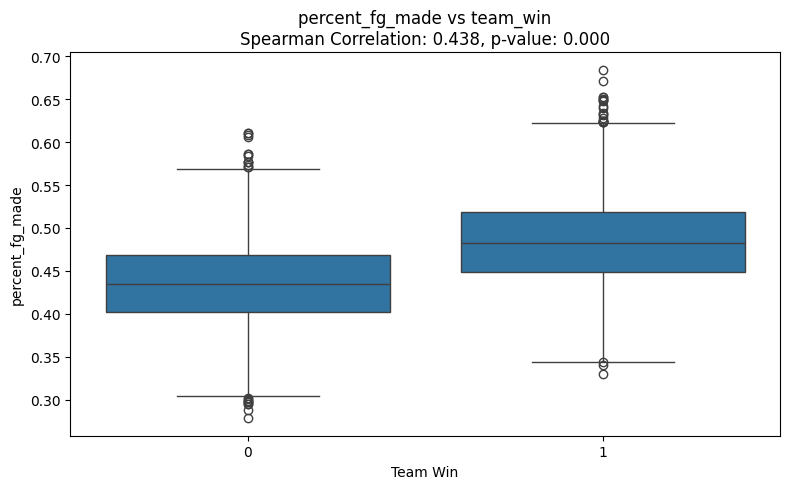

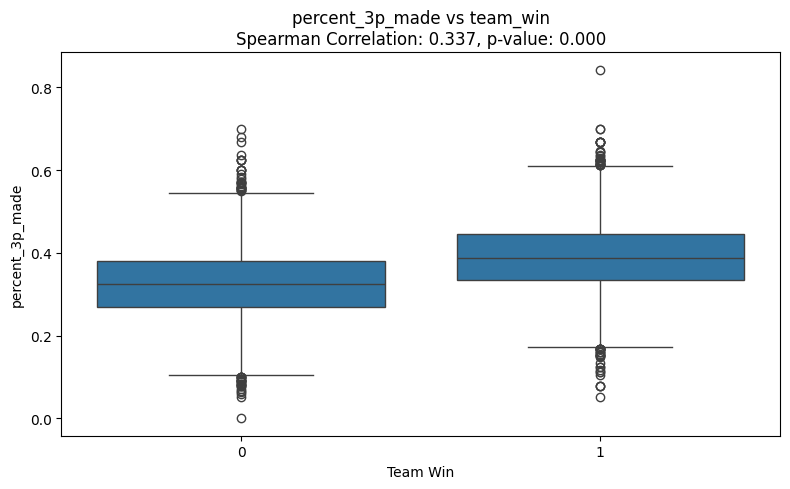

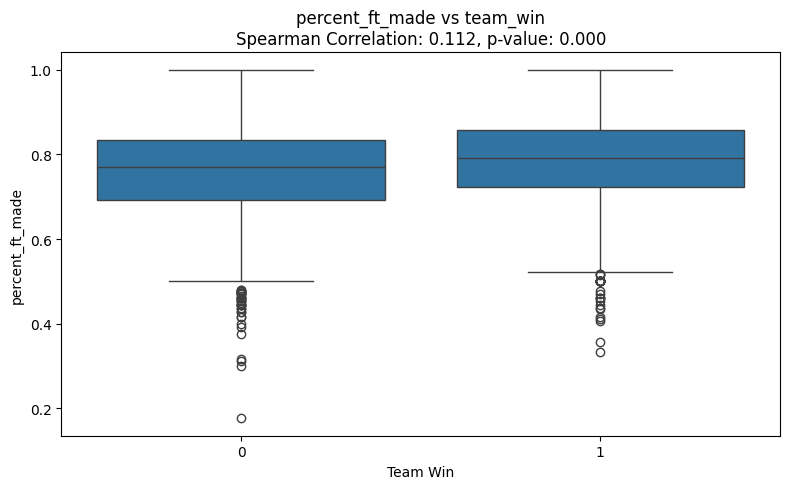

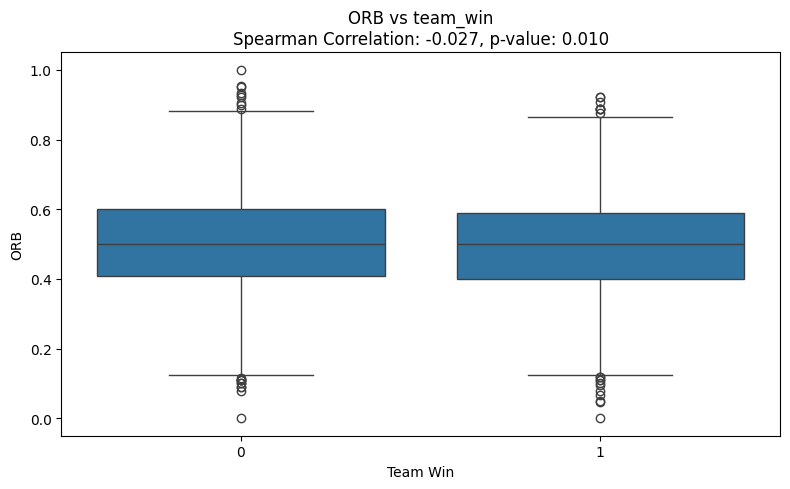

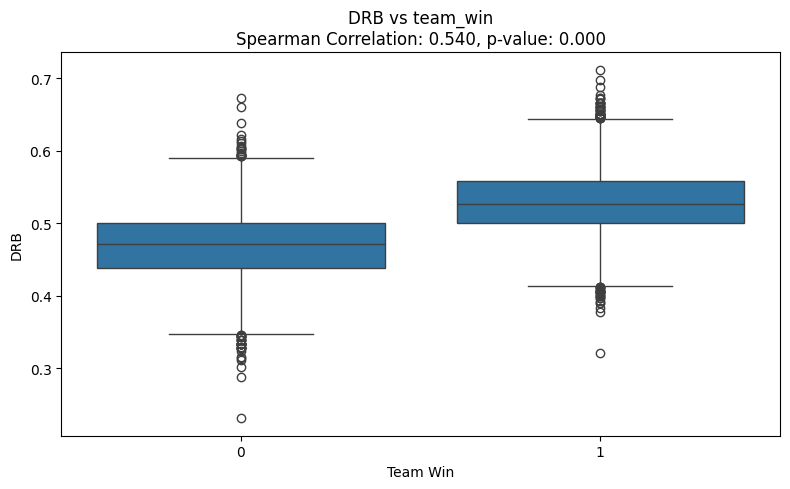

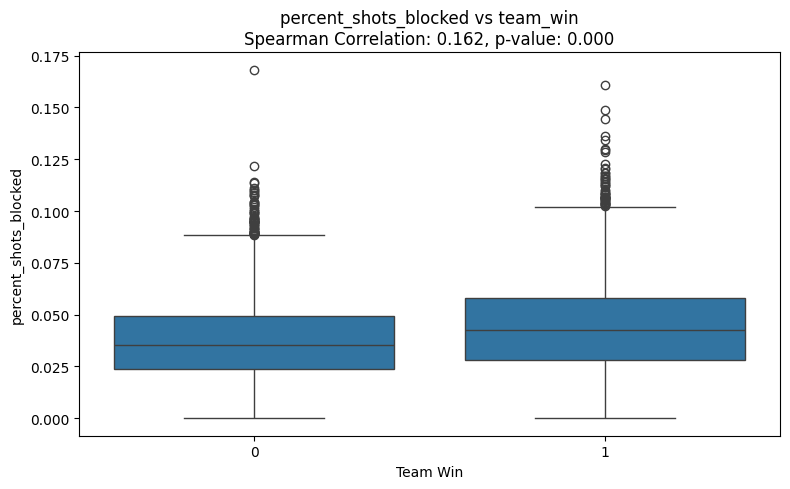

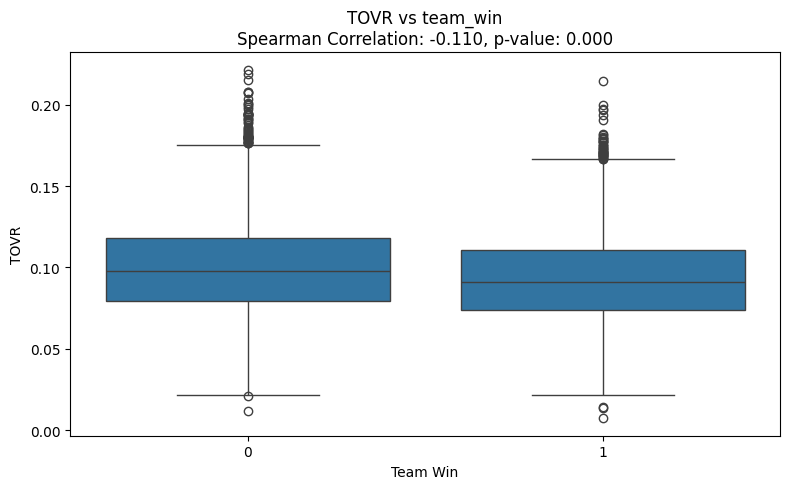

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Define the feature columns
target_columns = [
    'attempted_field_goals',
    'attempted_three_point_field_goals',
    'attempted_free_throws',
    'assists',
    'steals',
    'personal_fouls',
    'avg_game_score',
    'percent_fg_made',
    'percent_3p_made',
    'percent_ft_made',
    'ORB',
    'DRB',
    'percent_shots_blocked',
    'TOVR'
]

# Loop through each feature to compute Spearman's correlation and plot the result
for col in target_columns:
    # Calculate Spearman's rank correlation and p-value
    correlation, p_value = spearmanr(df[col], df['team_win'])

    # Create a boxplot to compare the distribution of the feature across team_win categories
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df['team_win'], y=df[col])

    # Annotate the plot with the Spearman correlation coefficient and p-value
    plt.title(f'{col} vs team_win\nSpearman Correlation: {correlation:.3f}, p-value: {p_value:.3f}')
    plt.xlabel('Team Win')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()
